# Overview of Logistic Regression

Logistic regression is a foundational machine learning technique that merges principles of regression with binary classification. It's particularly useful for cases where the output is a probability, a feature that sets it apart from other single neuron models.

## The Sigmoid Activation Function

At the heart of logistic regression lies the sigmoid activation function. This function is crucial because it converts any real-valued number into a probability between 0 and 1, using the formula:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
where x is the input. The output of this function represents the probability of the positive class, identified as '1'.

## Model Construction: Combining Linear Combination and Sigmoid Function

Logistic regression constructs its predictions starting with a linear combination of input features $x_i$, weights $w_i$, and a bias term $b$:
$$
z = \sum_{i} w_i x_i + b
$$

This value $z$ is then fed into the sigmoid function to obtain the final predicted probability:
$$
\hat{y} = \sigma(z)
$$



## Optimization: Training the Model with Gradient Descent

To optimize the logistic regression model, we use gradient descent (which we know very well by now), an algorithm that minimizes the cross-entropy loss function. This function measures the performance of the model across all training examples by comparing the predicted probabilities to the actual class labels:
$$
L(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Through iterative updates, parameters are adjusted to decrease the loss:
$$
\theta = \theta - \alpha \nabla_\theta L(\theta)
$$

Here, $θ$ represents all model parameters, $α$ is the learning rate, and $\nabla_\theta L(\theta)$ is the gradient of the loss function with respect to the parameters.


## Practical Application and Advantages
Unlike simpler models, logistic regression offers a probabilistic view of class predictions, making it a superior choice for datasets where classes are not linearly separable. The flexibility of the model, combined with its probabilistic output, allows it to be implemented using the same structure as a single neuron but with enhanced capabilities due to the sigmoid function. This makes logistic regression a versatile tool for binary classification tasks.

For our purposes, we will be running Logistic Regression on the Banknote Dataset, comparing 'Skewness' with 'Genuine/Forged'

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [145]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [209]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

y = y.values
y = y.ravel()

# Get indices where y is 0 and 1
indices_0 = np.where(y == 0)[0]
indices_1 = np.where(y == 1)[0]

# Select 50 indices from each
selected_indices_0 = indices_0[:50]
selected_indices_1 = indices_1[:50]

# Combine the indices
final_indices = np.concatenate([selected_indices_0, selected_indices_1])

# Use the indices to create the subset
y = y[final_indices]

X = X[['skewness']].values
X = X[final_indices]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


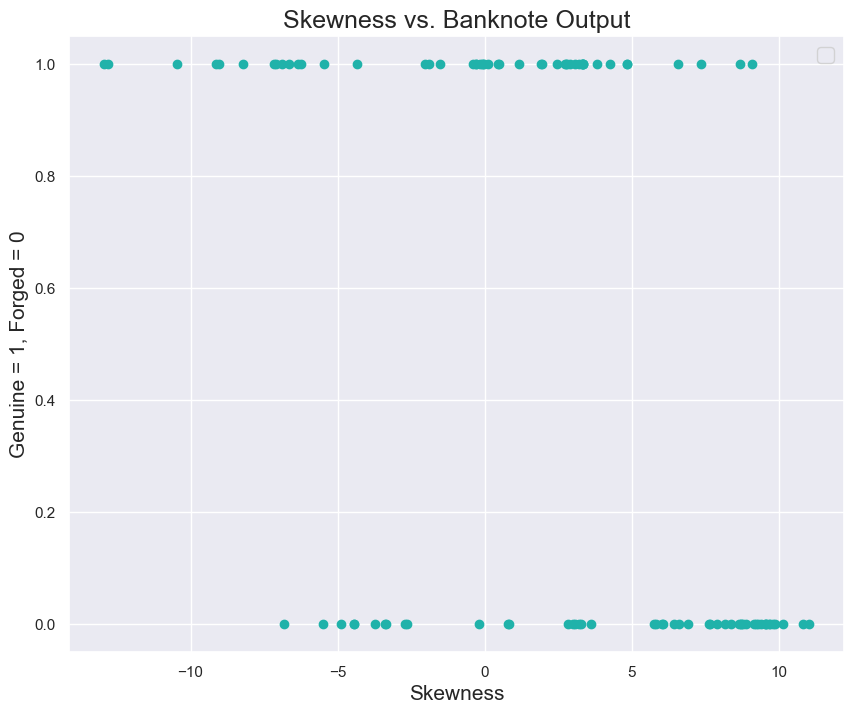

In [219]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Genuine = 1, Forged = 0", fontsize = 15)
plt.title("Skewness vs. Banknote Output", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

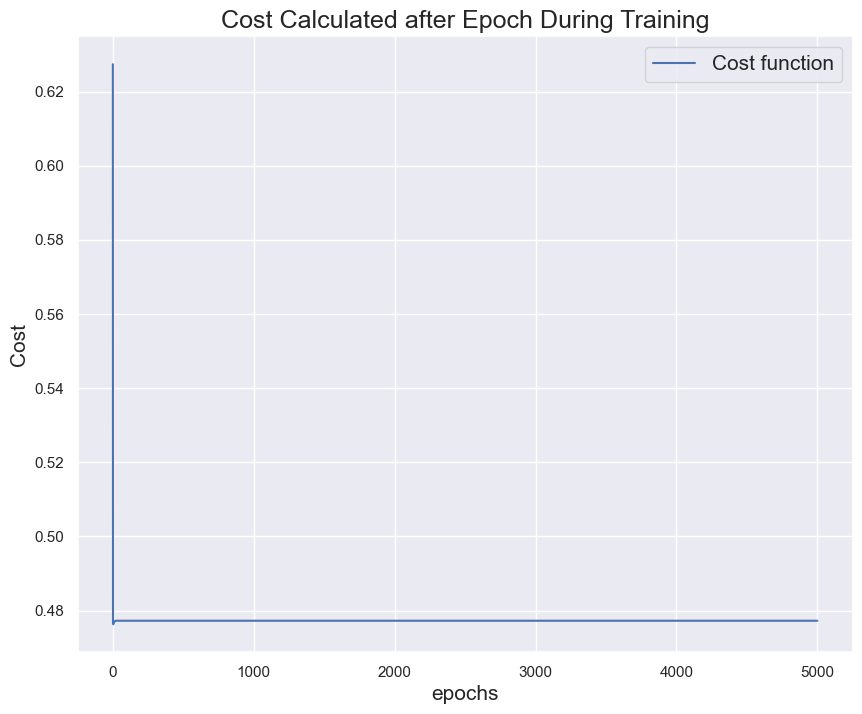

In [220]:
node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X, y, alpha = 0.02, epochs = 5000)
node.plot_cost_function()
plt.show()

The Cost seems to have stabilized, let's see the model's predictions.

In [221]:
x0 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 0])
x1 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 1])

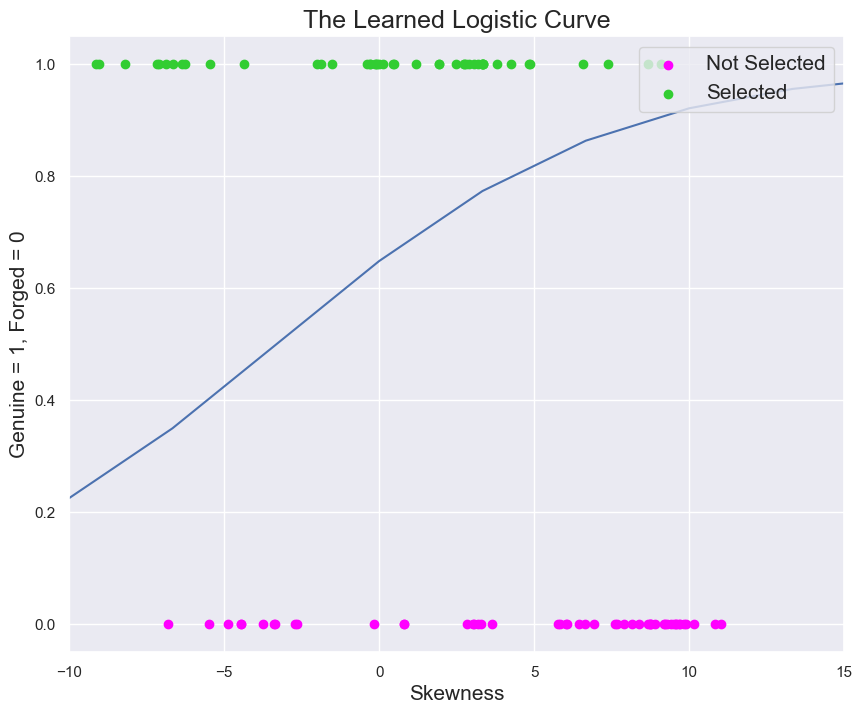

In [222]:
plt.figure(figsize = (10, 8))
plt.xlim((-10, 15))
plt.scatter(np.array(x0), 
            np.zeros(len(x0)), 
            color = "magenta", 
            label = "Not Selected")
plt.scatter(np.array(x1), 
            np.ones(len(x1)), 
            color = "limegreen", 
            label = "Selected")

domain = np.linspace(-10, 20, 10)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Genuine = 1, Forged = 0", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Let's visualize this as a histogram instead, to see the distribution of data points that are 'Genuine' vs 'Forged'.

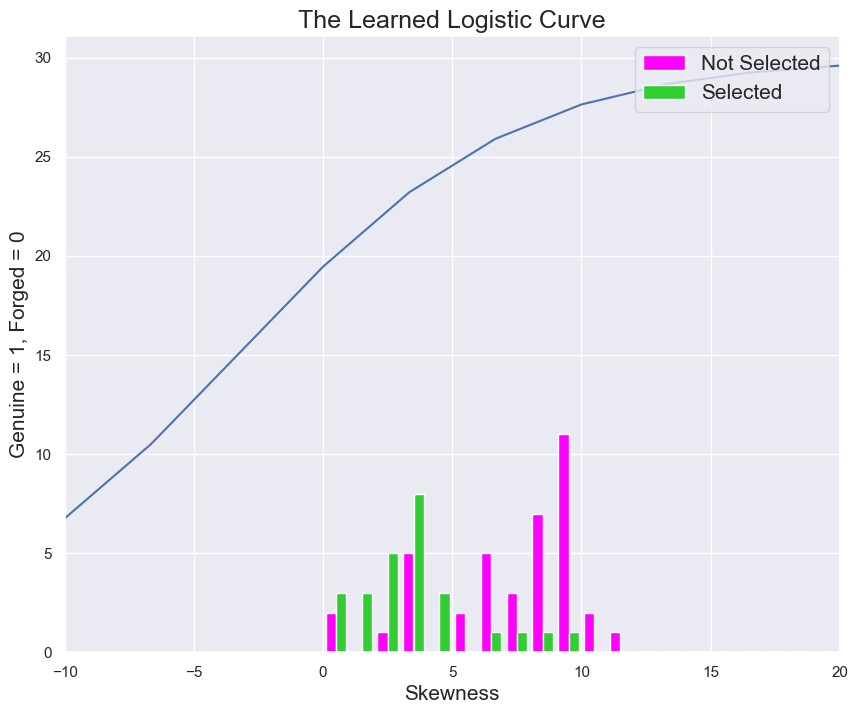

In [223]:
plt.figure(figsize = (10, 8))
plt.xlim((-10,20))

plt.hist([x0,x1],
         bins = list(range(40)),
         density = False,
         color = ["magenta", "limegreen"] ,
         label = ["Not Selected","Selected"])

plt.plot(domain, node.predict(domain.reshape(-1, 1))*30)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Genuine = 1, Forged = 0", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

It seems the model is picking more for 'Forged' than 'Genuine'. Let's create equal sample sizes to really visualize the distribution, and see what values of 'Skewness' result in 'Genuine' and vice versa.

In [224]:
x0 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 0])
x1 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 1])

y0 = np.array([0 for xi, yi in zip(X,y) if yi == 0])
y1 = np.array([1 for xi, yi in zip(X,y) if yi == 1])

X_train = np.concatenate((x0[0:50], x1[0:50]))
y_train = np.concatenate((y0[0:50], y1[0:50]))

node2 = SingleNeuron(sigmoid, cross_entropy_loss)
node2.train(X, y, alpha = 0.02, epochs = 5_000)

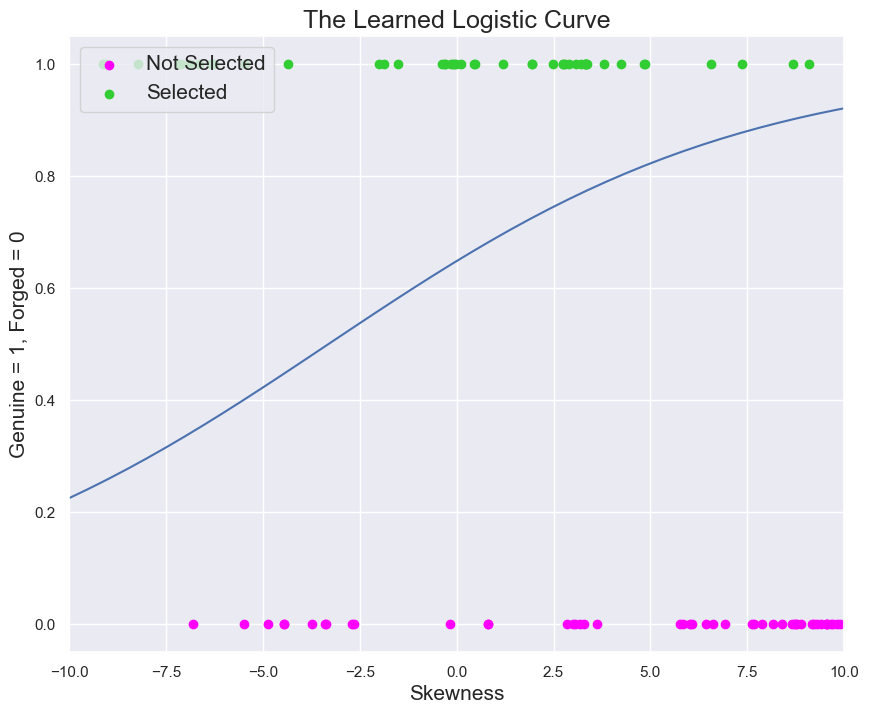

In [225]:
plt.figure(figsize = (10, 8))
plt.xlim((-10, 10))
plt.scatter(np.array(x0[0:50]), 
            np.zeros(50), 
            color = "magenta", 
            label = "Not Selected")
plt.scatter(np.array(x1[0:50]), 
            np.ones(50), 
            color = "limegreen", 
            label = "Selected")

domain = np.linspace(-10, 39, 100)
plt.plot(domain, node2.predict(domain.reshape(-1, 1)))
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Genuine = 1, Forged = 0", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

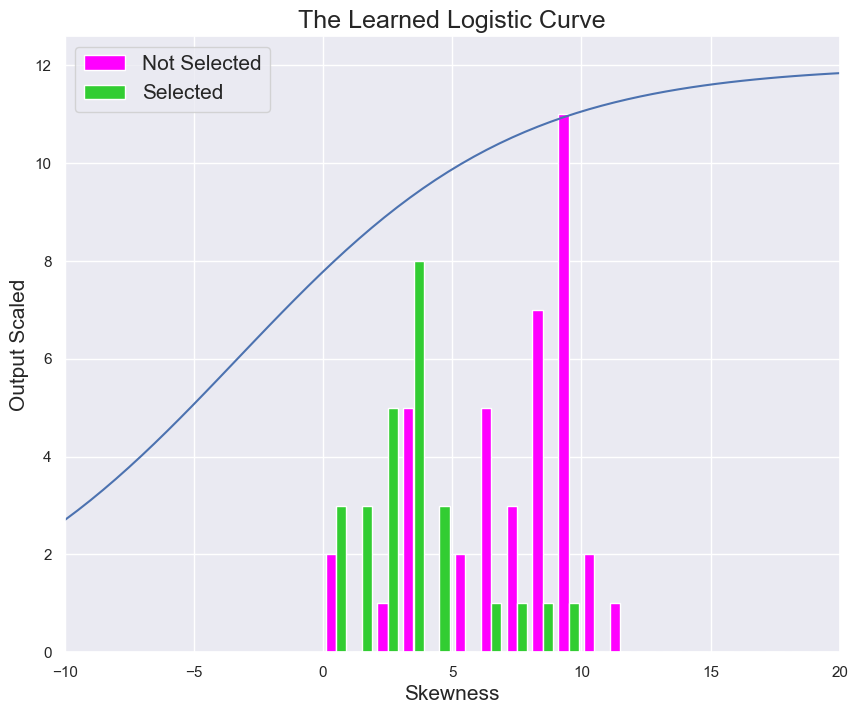

In [226]:
plt.figure(figsize = (10, 8))
plt.xlim((-10,20))

plt.hist([x0[0:50],x1[0:50]],
         bins = list(range(40)),
         density = False,
         color = ["magenta", "limegreen"] ,
         label = ["Not Selected","Selected"])

plt.plot(domain, node2.predict(domain.reshape(-1, 1))*12)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Output Scaled", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

As we can see, the logistic regression model grouped certain 'Skewness' ranges for Genuine, and others for Forged. While it is an impressive tool, it works better within other models rather than by itself.